# 데이터 분석 및 시각화

# 목차 <br>
- [총 매출 / 거래 수]
- [월별 매출 및 구매 현황]
- [채널별 매출 현황]
- [고객특성: 연령대]
- [고객특성: 뉴스 구독 여부(FN)]
- [고객특성: 멤버십 가입 여부]
- [고객특성: 재구매율 1]
- [고객특성: 재구매율 2]

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

art = pd.read_csv("data/articles_processed.csv")            # 상품 메타데이터
cust = pd.read_csv("data/customer_processed.csv")           # 고객 메타데이터
total_revenue = pd.read_csv("data/total_revenue.csv")       # 매출 데이터

In [33]:
# # ---------------------------------------------------------------------
# 분석용 통합 테이블 거래+고객+상품
# 볼수 있는 데이터
# ==  거래(매출, 채널, 날짜, 고객그룹) + 고객속성 + 상품속성
# 가입한 사람이 아닌 소비한 고객을 골라야 하기 때문에 inner 사용
# ---------------------------------------------------------------------

analysis_master = (
    total_revenue
    .merge(cust, on="customer_id", how="inner")
    .merge(art, on="article_id", how="inner")
)
analysis_master.shape

(804149, 27)

In [34]:
analysis_master.head()

,t_dat,customer_id,article_id,revenue,sales_channel_id,month,year_month,month_day,total_revenue,revenue_group,...,prod_name,product_type_info,product_group_name,graphical_appearance_info,perceived_colour_master_info,department_info,index_info,index_group_info,section_info,garment_group_info
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2,11,2019-11,11-05,0.227186,top_20,...,ZEBRA CF TVP,Sweater (252),Garment Upper body,Placement print (1010014),Blue (2),Tops Fancy Jersey (1640),Divided (D),Divided (2),Divided Collection (53),Jersey Fancy (1005)
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,760597002,0.033881,2,5,2019-05,05-22,0.067746,middle,...,BUBBLE WRAP TOP,Top (254),Garment Upper body,Stripe (1010017),White (9),Jersey (1660),Ladieswear (A),Ladieswear (1),Womens Casual (6),Jersey Fancy (1005)
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,488561032,0.016932,2,5,2019-05,05-10,0.016932,bottom_20,...,Teddy jogger.,Shorts (274),Garment Lower body,Chambray (1010024),Blue (2),Shorts (5658),Menswear (F),Menswear (3),Contemporary Casual (21),Shorts (1025)
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,682771001,0.033881,2,8,2019-08,08-26,0.033881,middle,...,Yuki shopper,Bag (66),Accessories,Solid (1010016),Black (5),Bags (3209),Ladies Accessories (C),Ladieswear (1),Womens Big accessories (65),Accessories (1019)
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,742400033,0.003220,1,8,2019-08,08-10,0.028627,middle,...,1pk Sportsock,Socks (302),Socks & Tights,All over pattern (1010001),White (9),Socks Wall (5999),Menswear (F),Menswear (3),Men Underwear (26),Socks and Tights (1021)


In [35]:
analysis_master.columns

Index(['t_dat', 'customer_id', 'article_id', 'revenue', 'sales_channel_id',
       'month', 'year_month', 'month_day', 'total_revenue', 'revenue_group',
       'FN', 'Active', 'club_member_status', 'fashion_news_frequency', 'age',
       'age_group', 'product_code', 'prod_name', 'product_type_info',
       'product_group_name', 'graphical_appearance_info',
       'perceived_colour_master_info', 'department_info', 'index_info',
       'index_group_info', 'section_info', 'garment_group_info'],
      dtype='str')

# H&M 서비스 현황 파악
- 고객·매출 데이터를 활용해 서비스 현황을 점검하고,
- 앞으로 H&M의 **고객 경험 개선**과 **매출 성장 전략**에 기여할 수 있는 결과물을 만들어야 합니다.

## 이번 프로젝트 요청사항
- 고객·매출 데이터를 탐색하여 서비스 현황을 시각화해 주세요. (???)
- 채널/상품군/고객 속성별 매출 특징을 분석해 주세요. (???)
- 이상치/결측치 처리 과정을 포함한 **탐색적 데이터 분석(EDA)** 결과를 제출해 주세요. (???)
- 분석 결과 및 인사이트(전략)을 제공해주세요. (???)

## 반드시 있어야 할 것
1. 전체 매출 규모
- 총 매출 → 현재 H&M 서비스가 창출하고 있는 전체 매출 규모를 파악한다.
- 고객 수 → 실제로 구매에 참여한 고객 풀의 크기를 확인한다.
- 거래 수 → 고객이 얼마나 자주 구매했는지, 전체 구매 활동량을 파악한다.

2. 채널별 매출 현황
- online vs offline 매출 비중 → 어떤 채널이 매출을 주도하고 있는지, 채널 전략의 중심을 판단한다.
- online vs offline 구매 횟수 비중 → 채널별로 구매 빈도 차이가 있는지 확인해 이용 행태를 파악한다.

3. 고객 속성별 매출 분포
- 뉴스 구독 여부(FN)별 매출 비중 → 마케팅 메시지(뉴스레터)가 실제 매출로 연결되는지 확인한다.
- 멤버십 가입 여부별 매출 비중 → 멤버십 제도가 충성 고객 확보와 매출 증대에 기여하는지 판단한다.
- 재구매율 → 고객이 한 번 구매로 끝나는지, 반복 구매로 이어지는지 확인해 서비스 만족도와 충성도를 평가한다.
- 매출 그룹(top / middle / bottom)별 매출 비중 → 소수의 고액 고객 의존도가 높은지, 매출 구조의 편중 여부를 파악한다. (안해도 되긴 하는데 넣음 걍)

## 이상치/결측치 처리 + EDA

결측치, 이상치(Outlier)


In [36]:
analysis_tx = analysis_master[
    [
        # 키
        "customer_id", "article_id",
        # 시간
        "t_dat", "year_month", "month", "month_day",
        # 거래
        "revenue", "sales_channel_id",
        # 고객 속성
        "age_group", "club_member_status", "FN", "Active",
        # 고객 매출그룹 - 이미 만들어둔 거 있으면 사용
        "revenue_group",
        # 상품 속성(추가 분석용)
        "product_group_name", "garment_group_info", "product_type_info",
        "graphical_appearance_info", "perceived_colour_master_info",
        "section_info", "index_group_info",
    ]
].copy()

In [37]:
analysis_tx.isna().sum()

customer_id                     0
article_id                      0
t_dat                           0
year_month                      0
month                           0
month_day                       0
revenue                         0
sales_channel_id                0
age_group                       0
club_member_status              0
FN                              0
Active                          0
revenue_group                   0
product_group_name              0
garment_group_info              0
product_type_info               0
graphical_appearance_info       0
perceived_colour_master_info    0
section_info                    0
index_group_info                0
dtype: int64

### 총 매출/거래 수

In [38]:
overall_summary = (
    analysis_tx
    .agg(
        total_revenue=("revenue", "sum"),           # 총 매출
        transaction_cnt=("revenue", "count"),       # 총 구매 건수
        customer_cnt=("customer_id", "nunique")     # 순수 구매 고객 수(재구매 반영 X)
    )
)

overall_summary

,revenue,customer_id
total_revenue,21488.307641,NaN
transaction_cnt,804149.000000,NaN
customer_cnt,NaN,351503.0


In [39]:
total_revenue = analysis_tx["revenue"].sum()
transaction_cnt = analysis_tx["revenue"].count()
customer_cnt = analysis_tx["customer_id"].nunique()

overall_summary = pd.Series(
    {
        "total_revenue": total_revenue,             # 총 매출
        "transaction_cnt": transaction_cnt,         # 총 구매 건수
        "customer_cnt": customer_cnt,               # 순수 구매 고객 수(재구매 반영 X)
    }
)

overall_summary

total_revenue       21488.307641
transaction_cnt    804149.000000
customer_cnt       351503.000000
dtype: float64

#### 분석결과
전체 거래 데이터를 기준으로 분석한 결과,<br>
총 매출은 약 21488.31 SEK (비율군이기 때문에 제대로된 값은 아님)<br>
총 거래 건수는 804149건<br>
구매 이력이 있는 고객 수는 351,503명으로 나타났다.<br>

### 월별 매출 및 구매 현황

In [40]:
# 월별 구매 지표: 매출 합계, 구매건수, 구매 고객 수
monthly_summary = (
    analysis_tx
    .groupby("year_month", as_index=False) # year_month 기준으로 월별 그룹화
    .agg(
        revenue_sum=("revenue", "sum"),             # 월별 총 매출
        purchase_cnt=("revenue", "count"),          # 월별 구매 건수 (거래 수)
        customer_cnt=("customer_id", "nunique")     # 월별 순수 구매 고객 수
    )
    .sort_values("year_month")                      # 월 기준 정렬
)

monthly_summary

,year_month,revenue_sum,purchase_cnt,customer_cnt
0,2019-01,1594.622894,62538,47614
1,2019-02,1511.408523,56833,44300
2,2019-03,1782.294962,63058,48103
3,2019-04,2047.041149,72620,54133
4,2019-05,2085.743826,76885,57353
5,2019-06,2374.354164,94433,69133
6,2019-07,1966.215640,89331,65522
7,2019-08,1468.587523,61834,46801
8,2019-09,1807.123473,59248,45995
9,2019-10,1628.808981,54530,43302


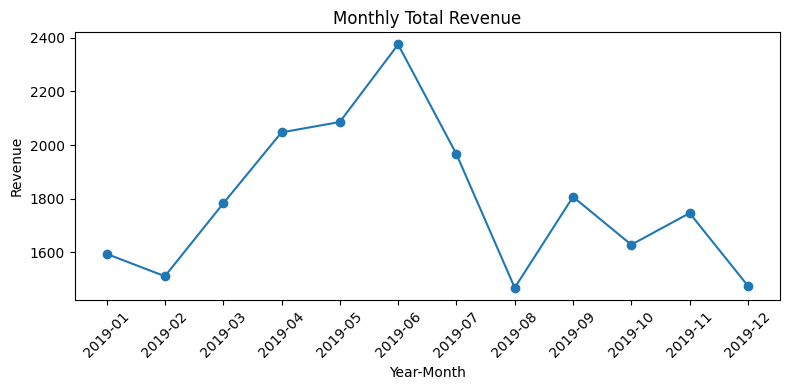

In [41]:
# 월별 총 매출
plt.figure(figsize=(8, 4))
plt.plot(
    monthly_summary["year_month"],
    monthly_summary["revenue_sum"],
    marker="o"
)
plt.title("Monthly Total Revenue")
plt.xlabel("Year-Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


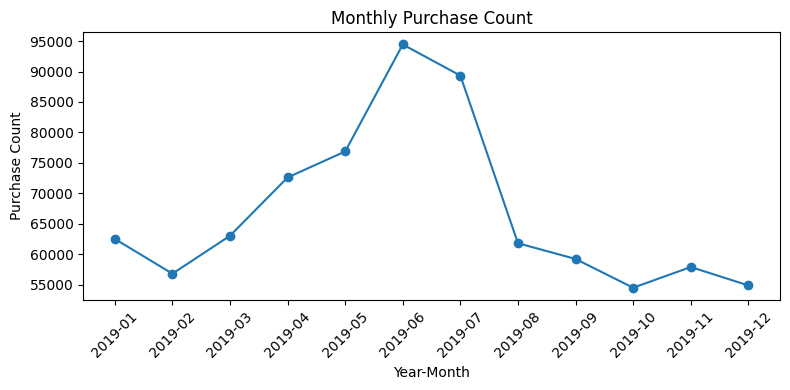

In [42]:
# 월별 구매 건수
plt.figure(figsize=(8, 4))
plt.plot(
    monthly_summary["year_month"],
    monthly_summary["purchase_cnt"],
    marker="o"
)
plt.title("Monthly Purchase Count")
plt.xlabel("Year-Month")
plt.ylabel("Purchase Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

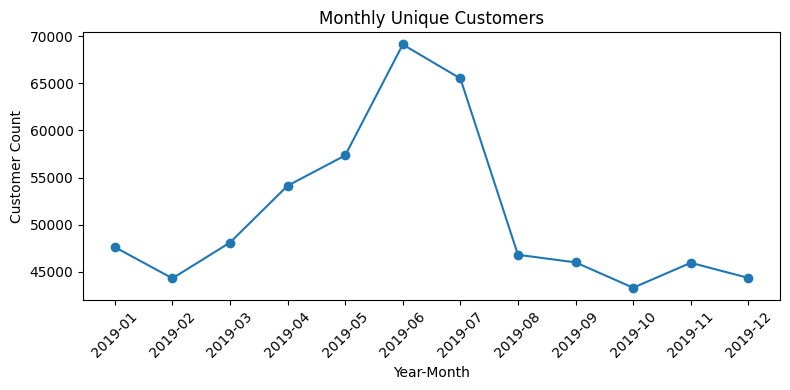

In [43]:
# 월별 순수 구매 고객 수
plt.figure(figsize=(8, 4))
plt.plot(
    monthly_summary["year_month"],
    monthly_summary["customer_cnt"],
    marker="o"
)
plt.title("Monthly Unique Customers")
plt.xlabel("Year-Month")
plt.ylabel("Customer Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 분석결과

월별 매출 분삭
- 1월~5월까지 매출이 점진적으로 증가하며 상반기 성장 흐름을 보입니다.
- 6월에 연중 최고 매출을 기록하며 매출 정점에 도달하며 이후 7월 이후 매출이 급감합니다.
- 하반기에는 전반적으로 낮은 수준에서 등락을 반복하고 있습니다.
- 연말(11~12월)에도 매출이 크게 반등하지 못해, 뚜렷한 연말 특수 효과는 관찰되지 않고 있습니다.

월별 거래 건수 분석
- 1월~5월까지 거래 건수가 증가하며 구매 활동이 점진적으로 활발해지며
- 6월에 거래 건수가 최고점을 기록합ㄴ디ㅏ.
- 7월 이후 거래 건수가 감소하며 구매 빈도가 낮아지는 흐름을 보입니다.
- 연말에도 거래 건수는 회복되지 않았습니다.
> 매출 추이와 유사한 흐름을 보여, 매출 증감이 구매 빈도 변화와 밀접하게 연관됨을 시사한다.

월별 순수 구매 고객 수 추이
- 구매 고객 수는 1월~6월까지 지속적으로 증가하여 6월에 가장 많은 고객수를 유지합니다.
- 7월 이후 고객 수가 크게 감소하며, 하반기에는 신규·재방문 고객 유입이 줄어들고 있습니다.
> 이는 하반기 매출 감소가 객단가 하락보다는 고객 수 감소의 영향이 큼을 보여주고 있습니다.

매출, 구매 건수, 구매 고객 수가 모두 6월을 정점으로 동일한 방향으로 움직이고 있습니다. <br>
이는 상반기 매출 성장이 고객 유입 증가와 구매 빈도 증가에 의해 발생??
????
반대로 하반기 매출 하락은 구매 고객 수 감소와 구매 활동 둔화가 동시에 작용

### 채널별 매출 현황

In [44]:
# 채널별 매출 / 거래수 집계 표
channel_ratio = (
    analysis_tx
    .groupby("sales_channel_id", as_index=False)    # 판매 채널 기준으로 그룹화
    .agg(
        revenue_sum=("revenue", "sum"),             # 채널별 총 매출
        transaction_cnt=("revenue", "size")         # 채널별 거래 수 (구매 건수)
    )
)
# 채널별 매출 비중
channel_ratio["revenue_ratio"] = (                
    channel_ratio["revenue_sum"]
    / channel_ratio["revenue_sum"].sum()
)

# 채널별 거래 수 비중
channel_ratio["transaction_ratio"] = (
    channel_ratio["transaction_cnt"]
    / channel_ratio["transaction_cnt"].sum()
)

channel_ratio

,sales_channel_id,revenue_sum,transaction_cnt,revenue_ratio,transaction_ratio
0,1,5547.886296,246592,0.258182,0.30665
1,2,15940.421345,557557,0.741818,0.69335


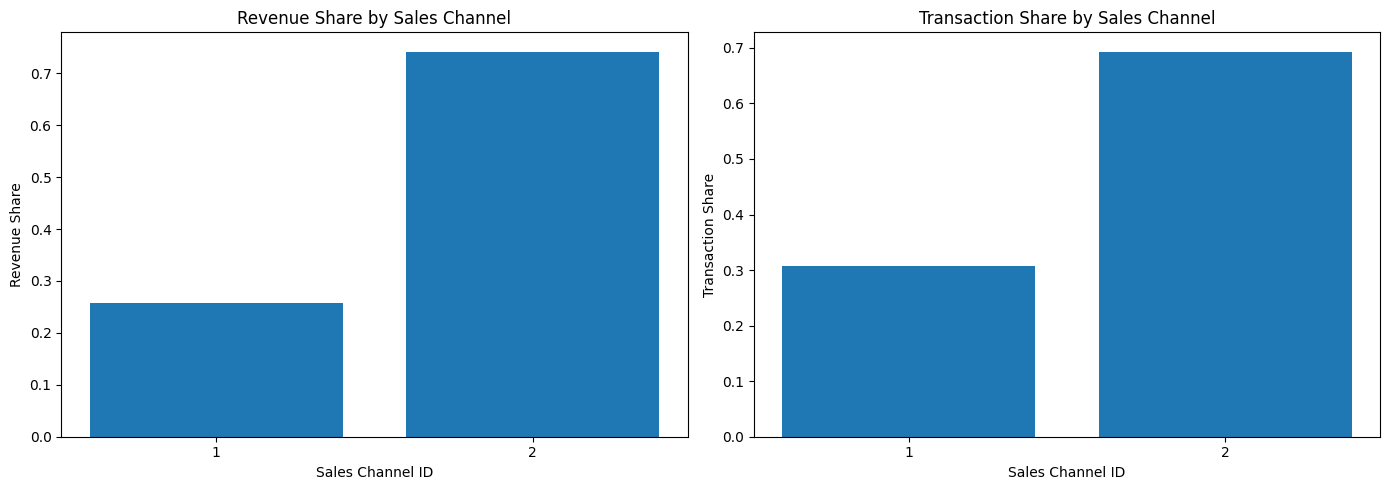

In [45]:
# 이중? 테아블
plt.figure(figsize=(14, 5))

# -----매출 비중-----
plt.subplot(1, 2, 1)
plt.bar(
    channel_ratio["sales_channel_id"].astype(str),
    channel_ratio["revenue_ratio"]
)
plt.title("Revenue Share by Sales Channel")
plt.xlabel("Sales Channel ID")
plt.ylabel("Revenue Share")

# -----거래 비중-----
plt.subplot(1, 2, 2)
plt.bar(
    channel_ratio["sales_channel_id"].astype(str),
    channel_ratio["transaction_ratio"]
)
plt.title("Transaction Share by Sales Channel")
plt.xlabel("Sales Channel ID")
plt.ylabel("Transaction Share")

plt.tight_layout()
plt.show()


#### 분석결과

온라인 채널
- 매출 비중: 약 74.2%
- 거래 비중: 약 69.3%

오프라인 채널
- 매출 비중: 약 약 25.8%
- 거래 비중: 약 약 30.7%

> 비중 기준으로 분석한 결과, 온라인 채널이 매출과 거래 모두에서 더 높은 비중을 차지하고 있다.

온라인 채널은 거래 비중 대비 매출 비중이 더 높게 나타나, 동일한 구매 빈도 대비 더 높은 평균 거래 금액을 형성하고 있는 채널로 해석됩니다. <br>
반면, 오프라인 채널은 거래 비중이 매출 비중보다 높아, 상대적으로 저가 상품 중심의 구매가 이루어졌을 가능성이 있습니다.

### 고객특성: 연령대

In [ ]:
first_month = (
    analysis_tx.groupby("customer_id", as_index=False)
      .agg(first_year_month=("year_month", "min"))
)

analysis_tx = analysis_tx.merge(first_month, on="customer_id", how="left")

In [61]:
# 연령대별 매출·거래 집계
age_summary = (
    analysis_tx
    .groupby("age_group", as_index=False)
    .agg(
        revenue_sum=("revenue", "sum"),         # 연령대별 총 매출
        transaction_cnt=("revenue", "size")     # 연령대별 거래 수
    )
)

# 매출 비중
age_summary["revenue_ratio"] = (
    age_summary["revenue_sum"]
    / age_summary["revenue_sum"].sum()
)

# 거래 비중
age_summary["transaction_ratio"] = (
    age_summary["transaction_cnt"]
    / age_summary["transaction_cnt"].sum()
)

age_summary

,age_group,revenue_sum,transaction_cnt,revenue_ratio,transaction_ratio
0,10s,319.993372,13706,0.014892,0.017044
1,20s,8671.755443,329595,0.403557,0.409868
2,30s,4391.867247,163944,0.204384,0.203873
3,40s,3305.217791,125414,0.153815,0.155959
4,50s,3746.465265,134553,0.174349,0.167323
5,60s+,1053.008524,36937,0.049004,0.045933


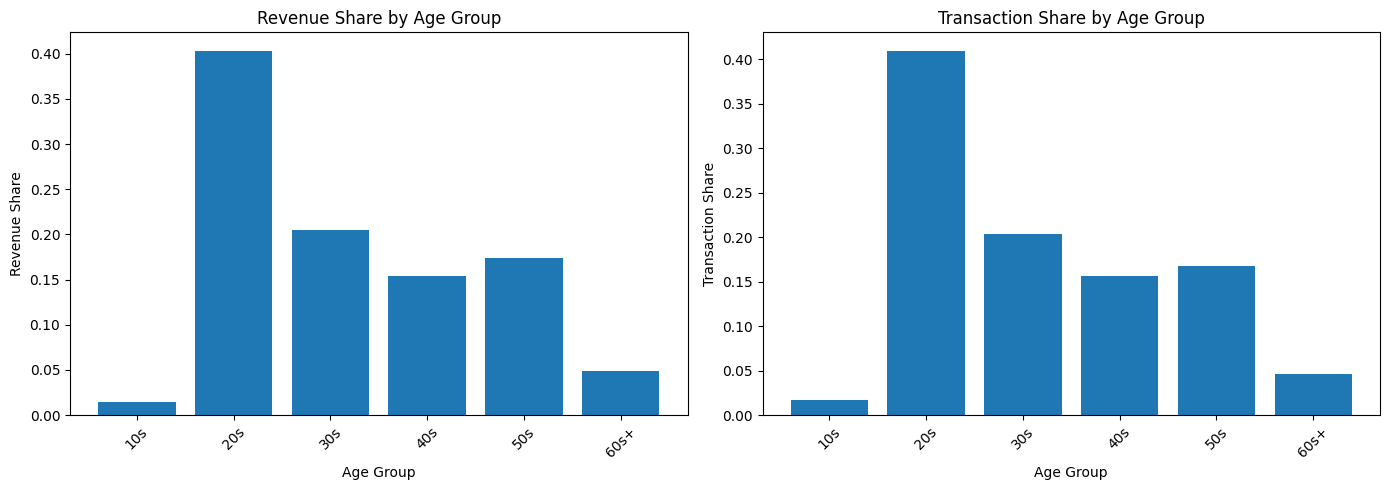

In [62]:
plt.figure(figsize=(14, 5))

# 매출 비중
plt.subplot(1, 2, 1)
plt.bar(
    age_summary["age_group"].astype(str),
    age_summary["revenue_ratio"]
)
plt.title("Revenue Share by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Revenue Share")
plt.xticks(rotation=45)

# 거래 비중
plt.subplot(1, 2, 2)
plt.bar(
    age_summary["age_group"].astype(str),
    age_summary["transaction_ratio"]
)
plt.title("Transaction Share by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Transaction Share")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 고객특성: 뉴스 구독 여부(FN)

In [46]:
# FN별 매출·거래 집계
fn_summary = (
    analysis_tx
    .groupby("FN", as_index=False)              # FN 구독 여부(True / False)
    .agg(
        revenue_sum=("revenue", "sum"),         # FN 상태별 총 매출
        transaction_cnt=("revenue", "size")     # FN 상태별 거래 수 (구매 건수)
    )
)

# FN 매출 비중
fn_summary["revenue_ratio"] = (
    fn_summary["revenue_sum"]
    / fn_summary["revenue_sum"].sum()
)
# FN 거래 비중
fn_summary["transaction_ratio"] = (
    fn_summary["transaction_cnt"]
    / fn_summary["transaction_cnt"].sum()
)

fn_summary

,FN,revenue_sum,transaction_cnt,revenue_ratio,transaction_ratio
0,False,12283.287928,456165,0.571627,0.567264
1,True,9205.019714,347984,0.428373,0.432736


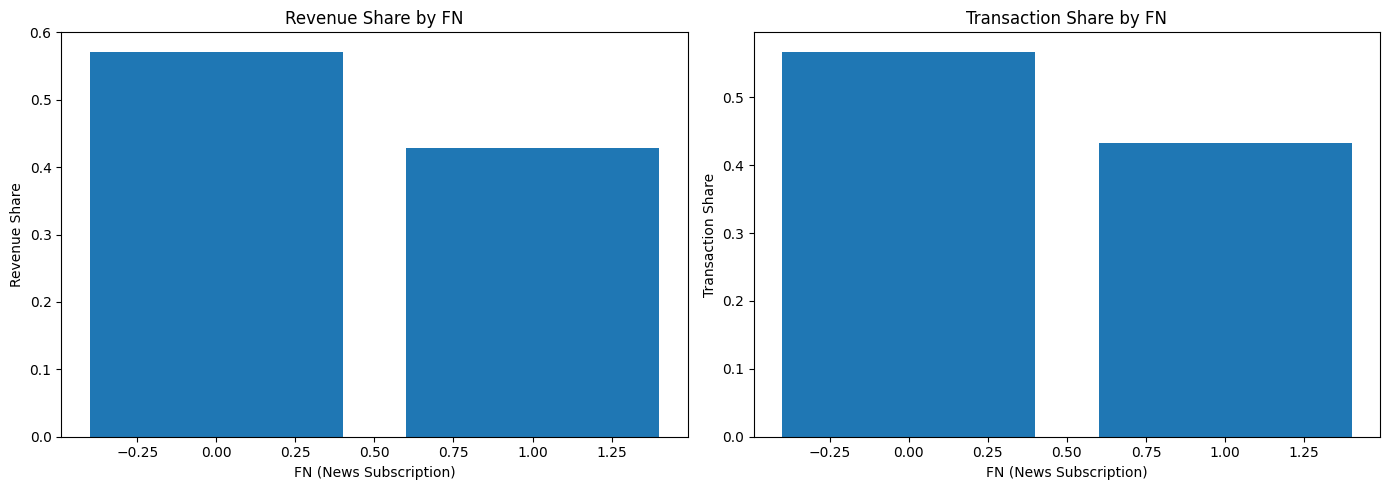

In [47]:
plt.figure(figsize=(14, 5))

# 매출 비중
plt.subplot(1, 2, 1)
plt.bar(fn_summary["FN"], fn_summary["revenue_ratio"])
plt.title("Revenue Share by FN")
plt.xlabel("FN (News Subscription)")
plt.ylabel("Revenue Share")

# 거래 비중
plt.subplot(1, 2, 2)
plt.bar(fn_summary["FN"], fn_summary["transaction_ratio"])
plt.title("Transaction Share by FN")
plt.xlabel("FN (News Subscription)")
plt.ylabel("Transaction Share")

plt.tight_layout()
plt.show()


#### 분석결과
- 비구독 고객(FN=False)
    - 매출 비중: 약 57.2%
    - 거래 비중: 약 56.7%

- 뉴스 구독 고객(FN=True)
    - 매출 비중: 약 42.8%
    - 거래 비중: 약 43.3%

> 뉴스 구독 여부에 따른 매출 및 거래 비중은 큰 차이를 보이지 않으며, 전체 매출 구조에서 비구독 고객의 비중이 다소 높게 나타난다.

뉴스 구독 고객은 거래 비중과 매출 비중이 유사한 수준으로 나타나, 뉴스레터 구독이 구매 빈도나 구매 금액을 크게 증폭시키는 요인으로 작용했다고 보기는 어렵다.

### 고객특성: 멤버십 가입 여부

In [48]:
member_summary = (
    analysis_tx
    .groupby("club_member_status", as_index=False)      # 멤버십 상태 기준으로 그룹화
    .agg(
        revenue_sum=("revenue", "sum"),                 # 멤버십 상태별 총 매출
        transaction_cnt=("revenue", "size")             # 멤버십 상태별 거래 수 (구매 건수)
    )
)

# 멤버십 상태별 매출 비중
member_summary["revenue_ratio"] = (
    member_summary["revenue_sum"]
    / member_summary["revenue_sum"].sum()
)

# 멤버십 상태별 거래 비중
member_summary["transaction_ratio"] = (
    member_summary["transaction_cnt"]
    / member_summary["transaction_cnt"].sum()
)

member_summary

,club_member_status,revenue_sum,transaction_cnt,revenue_ratio,transaction_ratio
0,Active,21004.532083,787503,0.977487,0.979300
1,Left Club,7.415068,257,0.000345,0.000320
2,Pre-Create,476.360490,16389,0.022168,0.020381


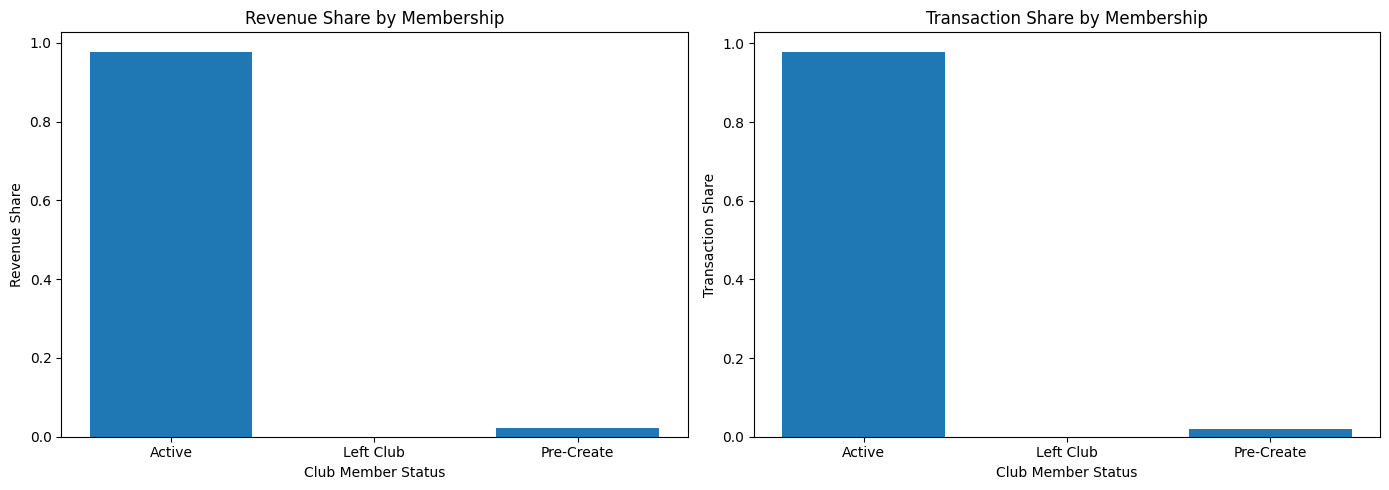

In [49]:
plt.figure(figsize=(14, 5))

# 매출 비중
plt.subplot(1, 2, 1)
plt.bar(
    member_summary["club_member_status"],
    member_summary["revenue_ratio"]
)
plt.title("Revenue Share by Membership")
plt.xlabel("Club Member Status")
plt.ylabel("Revenue Share")

# 거래 비중
plt.subplot(1, 2, 2)
plt.bar(
    member_summary["club_member_status"],
    member_summary["transaction_ratio"]
)
plt.title("Transaction Share by Membership")
plt.xlabel("Club Member Status")
plt.ylabel("Transaction Share")

plt.tight_layout()
plt.show()


#### 분석결과
- Active 멤버십 고객
    - 매출 비중: 약 97.7%
    - 거래 비중: 약 97.9%
- Pre-Create 고객
    - 매출 비중: 약 2.2%
    - 거래 비중: 약 2.0%
- Left Club 고객
    - 매출 및 거래 비중 모두 극히 미미한 수준

> 멤버십이 활성화된 고객(Active)이 전체 매출과 거래의 대부분을 차지하고 있다.

Active 멤버십 고객은 매출 비중과 거래 비중이 거의 동일한 수준으로 나타나, 구매 빈도와 구매 금액 모두에서 핵심적인 매출 기여 고객군임을 확인할 수 있다. <br>
반면, Pre-Create 및 Left Club 고객은 전체 매출 구조에서 차지하는 비중이 매우 낮아, 멤버십 전환 이전 또는 이탈 상태에서는 구매 활동이 제한적인 것으로 해석된다.

### 고객특성: 재구매율 1
    - 같은 달(첫 구매 월) 안에서 2회 이상 구매했는지

In [50]:
# 같은 고객이 같은 달에 몇 번 구매했는지
customer_month_cnt = (
    analysis_tx
    .groupby(["year_month", "customer_id"])
    .size()
    .reset_index(name="purchase_cnt")
)

In [51]:
# One-time  : 해당 월에 1회만 구매
# Repeat    : 해당 월에 2회 이상 구매
customer_month_cnt["purchase_type"] = "One-time"

customer_month_cnt.loc[
    customer_month_cnt["purchase_cnt"] >= 2,
    "purchase_type"
] = "Repeat"                                     



In [52]:
# 월별 고객 수 집계: 각 월에 1회 구매 고객 수+동일 월 재구매 고객 수
monthly_repeat = (
    customer_month_cnt
    .groupby(["year_month", "purchase_type"])["customer_id"]
    .nunique()
    .reset_index(name="customer_cnt")
)


In [53]:
# 월별 비중 계산: 같은 월 내에서의 고객 구성 비율
# One-time / Repeat 고객 비중 계산
monthly_repeat["ratio"] = (
    monthly_repeat["customer_cnt"]
    / monthly_repeat
        .groupby("year_month")["customer_cnt"]
        .transform("sum")
)

In [54]:
# year_month × 구매유형 구조로 변환
# year_month를 행(index),
# purchase_type을 열(columns),
# ratio를 값(values)으로 놓는다.

pivot_repeat = (
    monthly_repeat
    .pivot(
        index="year_month",
        columns="purchase_type",
        values="ratio"
    )
    .fillna(0)
    .sort_index()
)
pivot_repeat

purchase_type,One-time,Repeat
year_month,,
2019-01,0.775570,0.224430
2019-02,0.791129,0.208871
2019-03,0.776126,0.223874
2019-04,0.758317,0.241683
2019-05,0.757275,0.242725
2019-06,0.742858,0.257142
2019-07,0.747291,0.252709
2019-08,0.770966,0.229034
2019-09,0.786781,0.213219


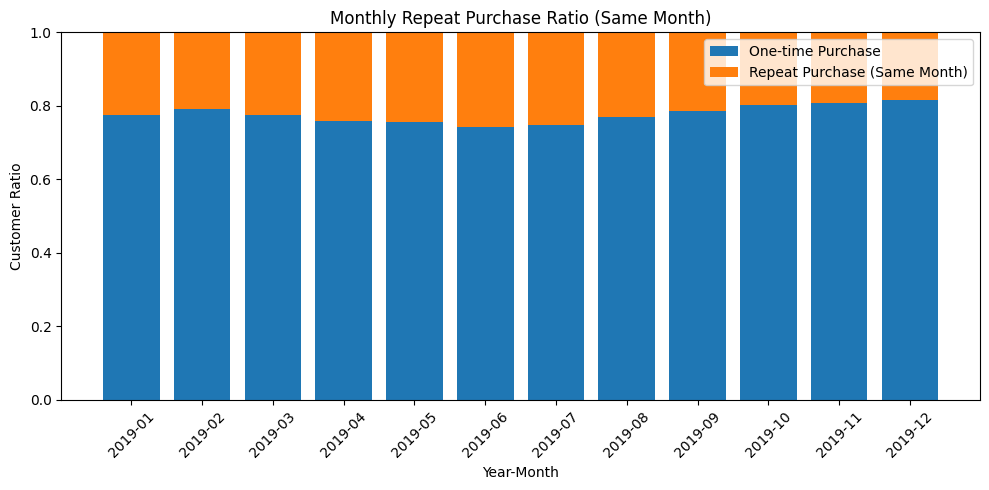

In [55]:
plt.figure(figsize=(10, 5))

# 1회 구매 고객
plt.bar(
    pivot_repeat.index,
    pivot_repeat["One-time"],
    label="One-time Purchase"
)

# 동일 월 재구매 고객 (위에 누적)
plt.bar(
    pivot_repeat.index,
    pivot_repeat["Repeat"],
    bottom=pivot_repeat["One-time"],
    label="Repeat Purchase (Same Month)"
)

plt.title("Monthly Repeat Purchase Ratio (Same Month)")
plt.xlabel("Year-Month")
plt.ylabel("Customer Ratio")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

#### 분석 결과
재구매율은 같은 달(year_month) 내에서 2회 이상 구매한 고객 비율로 정의한다.

- 상반기 (1~6월)
    - 1월: 재구매율 약 22.4%
    - 6월: 재구매율 약 25.7% (연중 최고 수준으로 나타남)
- 1월에서 6월로 갈수록 동일 월 내 재구매 비중이 점진적으로 증가하였다.

- 하반기 (7~12월)
    - 7월 이후로 재구매율이 지속적으로 하락하고 
    - 12월에 약 18.4%로 연중 최저 수준으로 나타난다.
- 하반기에 경우 동일 월 내 재구매보다는 ‘한 번에 구매’하는 경향이 강해진다. 

- 시즌 한정적 해석 (겨울시즌 11월~2월)
    - 11월: 재구매율 약 19.3%
    - 12월: 재구매율 약 18.4%

    - 1월: 재구매율 약 22.4
    - 2월: 재구매율 약 20.8%
- 선물 구매, 시즌성 소비로 인해 한 번에 여러 상품을 구매하는 것으로 파악된다.

> 전체 기간(2019년) 동안 같은 달 내 재구매율은 약 18~26% 수준으로<br> 
즉, 고객 4~5명 중 1명 정도만 한 달 안에 재구매를 수행한다 볼수 있다.

### 고객특성: 재구매율 2
    - 첫 월 구매 이후, 한번 더 구매

In [56]:
# 고객별 첫 구매 월
# 
# year_month의 최솟값 = 그 고객이 처음 구매한 월
first_purchase = (
    analysis_tx
    .groupby("customer_id")["year_month"]
    .min()
    .reset_index(name="first_year_month")
)

In [57]:
# 재구매 여부 구분
# 각 구매 행에 "이 고객의 첫 구매 월" 정보를 붙인다.
# (year_month > first_year_month)로 행 단위 비교 가능
analysis_repeat = analysis_tx.merge(
    first_purchase,
    on="customer_id",
    how="left"
)
# 기본은 First Purchase로 두고, (첫구매)
# 구매 월(year_month)이 첫 구매 월(first_year_month)보다 "뒤"면 Repeat로 바꾼다. (2번 이상 구매)
analysis_repeat["purchase_type"] = "First Purchase"
analysis_repeat.loc[
    analysis_repeat["year_month"] > analysis_repeat["first_year_month"],
    "purchase_type"
] = "Repeat Purchase"

# 해석:
# - year_month == first_year_month : 그 고객이 처음 구매했던 월의 거래(행)
# - Repeat == year_month >  first_year_month : 그 고객이 첫 구매 이후 다시 산 거래(행)

In [58]:
# 월별 고객 수 & 비중
# - First Purchase로 등장한 고객 수
# - Repeat Purchase로 등장한 고객 수
# 한 고객이 한 달에 여러 번 사도 고객은 1명으로 센다.
monthly_repeat = (
    analysis_repeat
    .groupby(["year_month", "purchase_type"])["customer_id"]
    .nunique() # count, siz 사용 금지: 거래 행 수가 아닌 고객 수를 세기 위함
    .reset_index(name="customer_cnt")
)

# 비중 계산
# 같은 월 안에서
# 그 월에 구매한 전체 고객 수 =  First 고객 수 + Repeat 고객 수
monthly_repeat["ratio"] = (
    monthly_repeat["customer_cnt"]
    / monthly_repeat
        .groupby("year_month")["customer_cnt"]
        .transform("sum")
)

In [59]:
# year_month를 행(index),
# purchase_type을 열(columns),
# ratio를 값(values)으로 놓는다.

pivot_repeat = (
    monthly_repeat
    .pivot(
        index="year_month",
        columns="purchase_type",
        values="ratio"
    )
    .fillna(0)
    .sort_index()
)

pivot_repeat

purchase_type,First Purchase,Repeat Purchase
year_month,,
2019-01,1.000000,0.000000
2019-02,0.861738,0.138262
2019-03,0.755795,0.244205
2019-04,0.673914,0.326086
2019-05,0.606786,0.393214
2019-06,0.555046,0.444954
2019-07,0.499496,0.500504
2019-08,0.427811,0.572189
2019-09,0.382976,0.617024


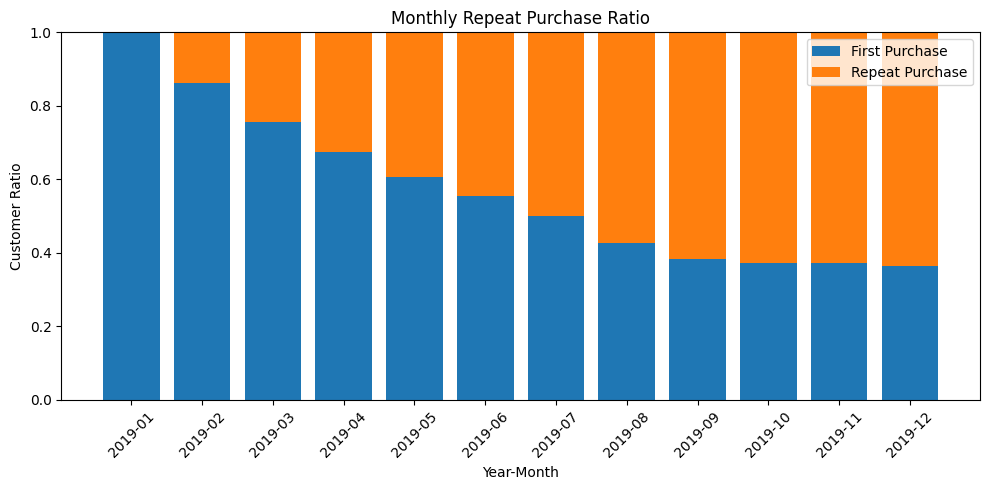

In [60]:
plt.figure(figsize=(10, 5))

plt.bar(
    pivot_repeat.index,
    pivot_repeat["First Purchase"],
    label="First Purchase"
)

plt.bar(
    pivot_repeat.index,
    pivot_repeat["Repeat Purchase"],
    bottom=pivot_repeat["First Purchase"],
    label="Repeat Purchase"
)

plt.title("Monthly Repeat Purchase Ratio")
plt.xlabel("Year-Month")
plt.ylabel("Customer Ratio")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

#### 분석 결과
첫 월 구매 이후, 다른 달에 한번 더 구매

상반기 재구매율 분석
- 1월: 100% 신규 고객
- 2월: 재구매율 13.8%
- 7월: 50.0% (전환점)

7월을 기점으로 재구매 고객이 신규 고객을 초과하는 전환점에 들어선다. <br>
이 시점부터 신규 고객 확보 전력보단 기존 고객 유지 전략이 더 필요로 보인다.

하반기 재구매율 분석
- 8월: 57.2%
- 10월: 62.7%
- 12월: 63.7%

- 연말로 갈수록 구매의 60% 이상이 재구매 고객에서 발생

겨울시즌은 신규 고객 보단 기존 고객의 누적 소비의 영향을 크게 받을 가능성이 있다.

# 주의사항
해당 재구매율 데이터는 2019년도를 기반으로 한 데이터로 분석하였기 때문에 큰 분별력을 가지긴 어렵다 볼순 있으나. <br>
점진적으로 증가하는 추세로 보아 신규 고객의 유입보단 기존 고객의 누적 소비가 더 비중이 크다 볼수 있다.